[0.28648004 0.27797211 0.2853021  0.26823024 0.24798439 0.24893717
 0.28547805 0.330526   0.34531047 0.34556159 0.3163217  0.27999519]
[0.25899549 0.25208335 0.25825953 0.23964024 0.21216013 0.22457181
 0.25216943 0.31155634 0.35198604 0.33240981 0.32047034 0.24180941]


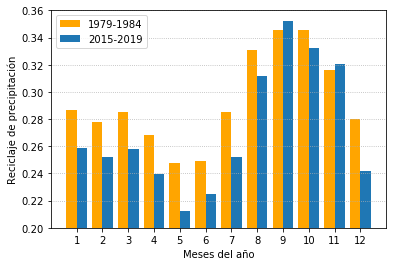

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap,LinearSegmentedColormap,Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math

#MEDIA DE UN MES EN UNOS AÑOS
carpeta='AMAZONAS'
zona='AMAZONAS'
R=6371000
#mes='diciembre 2015-2019'
princ=0
final=60
num=final-princ

lon=np.loadtxt('C:/Users/jonre/TFG/%s/lon_%s.txt'%(carpeta,zona))
lat=np.loadtxt('C:/Users/jonre/TFG/%s/lat_%s.txt'%(carpeta,zona))
lon2=np.loadtxt('C:/Users/jonre/TFG/%s/lon2_%s.txt'%(carpeta,zona))
lat2=np.loadtxt('C:/Users/jonre/TFG/%s/lat2_%s.txt'%(carpeta,zona))
mask2=np.loadtxt('C:/Users/jonre/TFG/%s/mask2_%s.txt'%(carpeta,zona))

A_sum=0

for y in range(len(lat2)): 
    for x in range(len(lon2)):
        Atetha=math.radians(1.0)
        Alambda=math.radians(1.0)
        tethamedio=math.radians(lat2[y])
        #A=(R**2)*(math.sin(tethamedio+(Atetha/2.0))-math.sin(tethamedio-(Atetha/2.0)))*Alambda
        A=(R**2)*2*math.cos(tethamedio)*math.sin(Atetha/2)*Alambda
        if mask2[y,x]==1:
            A_sum = A_sum + A
            
#CALCULAR RHO POR MES EN UN AÑO DE DOS FORMAS

rho=np.zeros((num,len(lat2),len(lon2)))
P=np.zeros((num,len(lat2),len(lon2)))
rho_dist=np.zeros((num))
rho_p_dist=np.zeros((num))
P_sum=np.zeros((num))
p_dist=np.zeros((num))
for t in range(princ, final):
    rho[t-princ]=np.loadtxt('C:/Users/jonre/TFG/%s/rho_%s_%d.txt'%(carpeta,zona,t))
    P[t-princ]=np.loadtxt('C:/Users/jonre/TFG/%s/P_mm_%s_%d.txt'%(carpeta,zona,t))

    
    for y in range(len(lat2)): 
        for x in range(len(lon2)):
            P_sum[t-princ]= P_sum[t-princ]+P[t-princ,y,x]
            
            
for t in range(final-princ):
    for y in range(len(lat2)): 
        for x in range(len(lon2)):
            Atetha=math.radians(1.0)
            Alambda=math.radians(1.0)
            tethamedio=math.radians(lat2[y])
            #A=(R**2)*(math.sin(tethamedio+(Atetha/2.0))-math.sin(tethamedio-(Atetha/2.0)))*Alambda
            A=(R**2)*2*math.cos(tethamedio)*math.sin(Atetha/2)*Alambda
            
            rho_dist[t]=rho_dist[t] + (rho[t,y,x]*A)/(A_sum)
            rho_p_dist[t]=rho_p_dist[t] +(rho[t,y,x]*(P[t,y,x]/P_sum[t]))
            
rho_por_meses=np.zeros((12))  
rho_P_por_meses=np.zeros((12))

for i in range(12):
    k=0
    init=princ+i
    for t in range(init,final,12):
        rho_por_meses[i]=rho_por_meses[i]+rho_dist[t-princ]
        rho_P_por_meses[i]=rho_P_por_meses[i]+rho_p_dist[t-princ]
        k=k+1
    rho_por_meses[i]=rho_por_meses[i]/k
    rho_P_por_meses[i]=rho_P_por_meses[i]/k


print(rho_P_por_meses)

#------------------------------------------------
princ=432
final=492
num=final-princ

A_sum0=0

for y in range(len(lat2)): 
    for x in range(len(lon2)):
        Atetha=math.radians(1.0)
        Alambda=math.radians(1.0)
        tethamedio=math.radians(lat2[y])
        #A=(R**2)*(math.sin(tethamedio+(Atetha/2.0))-math.sin(tethamedio-(Atetha/2.0)))*Alambda
        A=(R**2)*2*math.cos(tethamedio)*math.sin(Atetha/2)*Alambda
        if mask2[y,x]==1:
            A_sum0 = A_sum0 +A
#CALCULAR RHO POR MES EN UN AÑO DE DOS FORMAS

rho=np.zeros((num,len(lat2),len(lon2)))
P=np.zeros((num,len(lat2),len(lon2)))
rho_dist2=np.zeros((num))
rho_p_dist2=np.zeros((num))
P_sum=np.zeros((num))
p_dist=np.zeros((num))
for t in range(princ, final):
    rho[t-princ]=np.loadtxt('C:/Users/jonre/TFG/%s/rho_%s_%d.txt'%(carpeta,zona,t))
    P[t-princ]=np.loadtxt('C:/Users/jonre/TFG/%s/P_mm_%s_%d.txt'%(carpeta,zona,t))

    
    for y in range(len(lat2)): 
        for x in range(len(lon2)):
            P_sum[t-princ]= P_sum[t-princ]+P[t-princ,y,x]
            
            
for t in range(final-princ):
    for y in range(len(lat2)): 
        for x in range(len(lon2)):
            Atetha=math.radians(1.0)
            Alambda=math.radians(1.0)
            tethamedio=math.radians(lat2[y])
            #A=(R**2)*(math.sin(tethamedio+(Atetha/2.0))-math.sin(tethamedio-(Atetha/2.0)))*Alambda
            A=(R**2)*2*math.cos(tethamedio)*math.sin(Atetha/2)*Alambda
            
            rho_dist2[t]=rho_dist2[t] + (rho[t,y,x]*A)/(A_sum)
            rho_p_dist2[t]=rho_p_dist2[t] +(rho[t,y,x]*(P[t,y,x]/P_sum[t]))
            
rho_por_meses2=np.zeros((12))  
rho_P_por_meses2=np.zeros((12))

for i in range(12):
    k=0
    init=princ+i
    for t in range(init,final,12):
        rho_por_meses2[i]=rho_por_meses2[i]+rho_dist2[t-princ]
        rho_P_por_meses2[i]=rho_P_por_meses2[i]+rho_p_dist2[t-princ]
        k=k+1
    rho_por_meses2[i]=rho_por_meses2[i]/k
    rho_P_por_meses2[i]=rho_P_por_meses2[i]/k


print(rho_P_por_meses2)





#GRAFICA DE BARRAS POR MESES
numero_de_grupos = len(rho_P_por_meses)
indice_barras = np.arange(numero_de_grupos)


plt.bar(indice_barras -0.2, rho_P_por_meses,color='orange',width=0.4, label='1979-1984')
plt.bar(indice_barras +0.2 , rho_P_por_meses2,width=0.4, label='2015-2019')


plt.xticks(indice_barras, ('1', '2', '3', '4', '5', '6', '7', '8','9', '10', '11', '12'))
plt.ylim(0.20, 0.36)
plt.xlabel('Meses del año')
plt.ylabel('Reciclaje de precipitación')
plt.grid(axis='y',linestyle='dotted')
plt.legend()
plt.savefig("C:/Users/jonre/TFG/graficas para el tfg/rho_P_por_meses_%s_media_1979-1984.jpg"%(zona), bbox_inches='tight')  

